###### Acadêmicos: Gabriel Schneider de Jesus e Luciane Tedesco

# Lista de Exercícios 02

___

## Questão 2
Implementação da validação de dados de entrada através de uma lista branca.

### Código fonte

In [ ]:
import psycopg2
try:

  # Cria uma conexão com o banco de dados
  connection = psycopg2.connect(user = "postgres",
                                password = "postgres",
                                host="localhost",
                                port = "5432",
                                database = "pg_db")
  cursor = connection.cursor()

  # Cria a tabela professor com os campos nome, titulação e departamento
  cursor.execute("CREATE TABLE professor (id_professor int, nm_professor varchar(50), ds_titulacao varchar(30), ds_departamento varchar(30), PRIMARY KEY(id_professor));")
  
  # Popula a tabela
  cursor.execute("INSERT INTO professor (id_professor, nm_professor, ds_titulacao, ds_departamento) VALUES (1, 'Gilvan Justino', 'Mestrado', 'Sistemas e Computação');")
  cursor.execute("INSERT INTO professor (id_professor, nm_professor, ds_titulacao, ds_departamento) VALUES (2, 'Aurélio Faustino Hoppe', 'Mestrado', 'Sistemas e Computação');")
  cursor.execute("INSERT INTO professor (id_professor, nm_professor, ds_titulacao, ds_departamento) VALUES (3, 'Georges Cherry Rodrigues', 'Mestrado', 'Matemática');")
  cursor.execute("INSERT INTO professor (id_professor, nm_professor, ds_titulacao, ds_departamento) VALUES (4, 'Luciana Pereira de Araújo Kohler', 'Mestrado', 'Sistemas e Computação');")
  cursor.execute("INSERT INTO professor (id_professor, nm_professor, ds_titulacao, ds_departamento) VALUES (5, 'Everaldo Artur Grahl', 'Mestrado', 'Sistemas e Computação');")
  cursor.execute("INSERT INTO professor (id_professor, nm_professor, ds_titulacao, ds_departamento) VALUES (6, 'Francisco Adell Péricas', 'Mestrado', 'Sistemas e Computação');")
  cursor.execute("INSERT INTO professor (id_professor, nm_professor, ds_titulacao, ds_departamento) VALUES (7, 'Andreza Sartori', 'Doutorado', 'Sistemas e Computação');")
  cursor.execute("INSERT INTO professor (id_professor, nm_professor, ds_titulacao, ds_departamento) VALUES (8, 'Dalton Solano dos Reis', 'Mestrado', 'Sistemas e Computação');")
  cursor.execute("INSERT INTO professor (id_professor, nm_professor, ds_titulacao, ds_departamento) VALUES (9, 'Marcel Hugo', 'Mestrado', 'Sistemas e Computação');")
  cursor.execute("INSERT INTO professor (id_professor, nm_professor, ds_titulacao, ds_departamento) VALUES (10, 'Joyce Martins', 'Mestrado', 'Sistemas e Computação');")
  
  # Prevenção de Sql Injection com lista branca
  possible_characters = [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'z','á', 'ã', 'à', 'â', 'í', 'ì', 'î', 'ú', 'ù', 'û', 'é', 'è', 'ê', 'ó', 'ò', 'õ', 'ô']
  name = input('Digite o nome do professor: ')

  for letter in name.lower():
  	if letter not in possible_characters:
  		raise Exception("Caractere \'" + letter + "\' não permitido.")
  		
  cursor.execute("SELECT * FROM professor WHERE nm_professor = '%s';" % name)
  
  # Recupera e mostra os registros
  print('Registro(s): ', cursor.rowcount)
  for row in cursor.fetchall():
    print (row)

except (Exception, psycopg2.Error) as error:
  print ("Erro ao conectar.", error)
  
finally:
# Fecha a conexão
  if (connection):
    cursor.close()
    connection.close()

### Evidências
Para corrigir a vulnerabilidade de entradas inadequadas de dados, implementamos uma validação de lista branca. A lista *possible_characters* possui todas as entradas aceitáveis.

__Exemplos:__

1.  Com a validação implementada, o usuário não conseguirá utilizar caracteres especiais. É aceito apenas os caracteres considerados válidos.
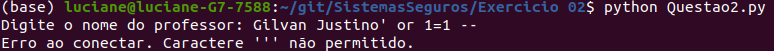